In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
d0 = pd.read_csv('train0.csv')


In [2]:
d0 = d0.iloc[:,1:]

In [3]:
d0.shape

(3567, 784)

C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


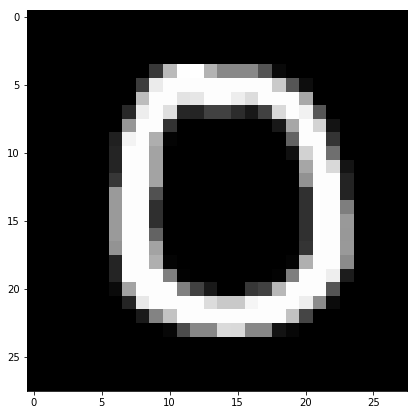

In [4]:
plt.figure(figsize=(7,7))
idx = 344
grid_data = d0.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()



In [5]:
d0['label'] = 0 

In [6]:
d1 = pd.read_csv('train1.csv')
d2 = pd.read_csv('train2.csv')
d3 = pd.read_csv('train3.csv')
d4 = pd.read_csv('train4.csv')
d5 = pd.read_csv('train5.csv')
d6 = pd.read_csv('train6.csv')
d7 = pd.read_csv('train7.csv')
d8 = pd.read_csv('train8.csv')
d9 = pd.read_csv('train9.csv')


C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
d1 = d1.iloc[:,1:]
d2 = d2.iloc[:,1:]
d3 = d3.iloc[:,1:]
d4 = d4.iloc[:,1:]
d5 = d5.iloc[:,1:]
d6 = d6.iloc[:,1:]
d7 = d7.iloc[:,1:]
d8 = d8.iloc[:,1:]
d9 = d9.iloc[:,1:]

In [8]:
d1['label'] = 1
d2['label'] = 2
d3['label'] = 3 
d4['label'] = 4 
d5['label'] = 5 
d6['label'] = 6 
d7['label'] = 7 
d8['label'] = 8 
d9['label'] = 9 

In [9]:
##reading test data
t0 = pd.read_csv('test0.csv')
t1 = pd.read_csv('test1.csv')
t2 = pd.read_csv('test2.csv')
t3 = pd.read_csv('test3.csv')
t4 = pd.read_csv('test4.csv')
t5 = pd.read_csv('test5.csv')
t6 = pd.read_csv('test6.csv')
t7 = pd.read_csv('test7.csv')
t8 = pd.read_csv('test8.csv')
t9 = pd.read_csv('test9.csv')
t0 = t0.iloc[:,1:]
t1 = t1.iloc[:,1:]
t2 = t2.iloc[:,1:]
t3 = t3.iloc[:,1:]
t4 = t4.iloc[:,1:]
t5 = t5.iloc[:,1:]
t6 = t6.iloc[:,1:]
t7 = t7.iloc[:,1:]
t8 = t8.iloc[:,1:]
t9 = t9.iloc[:,1:]


In [10]:
t1['label'] = 1
t2['label'] = 2
t3['label'] = 3 
t4['label'] = 4 
t5['label'] = 5 
t6['label'] = 6 
t7['label'] = 7 
t8['label'] = 8 
t9['label'] = 9 

In [11]:
test_final = t0.append([t1,t2,t3,t4,t5,t6,t7,t8,t9])

C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
##concatenating testing data
test_final.fillna(0, inplace=True)

In [13]:
y_test=test_final.iloc[:,784:]
x_test = test_final.iloc[:,:-1]

In [14]:
##concatenating training data
final = d0.append([d1,d2,d3,d4,d5,d6,d7,d8,d9])

In [15]:
final_one = final.iloc[:,:-1]

In [16]:
final_label = final.iloc[:,784:]

In [17]:
final_one = final.iloc[:,:-1]

In [18]:
y_test.shape

(24190, 1)

In [19]:
#final_label
#y_test

In [20]:
##doing PCA on test sample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(x_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
data_two = pca.fit_transform(data1)

(36470, 9)

In [21]:
final_one.fillna(0, inplace=True)

In [22]:
##doing PCA on training sample

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(final_one)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
data_one = pca.fit_transform(data)


In [24]:
##Diagonal Covariance Matrix

from sklearn.mixture import GaussianMixture as mix
model = mix(n_components = 10, init_params='kmeans',
           n_init = 5, max_iter = 5000, covariance_type = 'diag')
# Fit a Gaussian Mixture Model



In [203]:
fit1 = model.fit(data_one,final_label)

In [205]:
y_pred = fit1.predict(data_two)

In [186]:
preds = model.predict(data_one)

In [206]:
y_pred

array([7, 7, 2, ..., 8, 8, 8], dtype=int64)

In [208]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.09892517569243489

In [209]:
##Full Covariance Matrix

from sklearn.mixture import GaussianMixture as mix
model = mix(n_components = 10, init_params='kmeans',
           n_init = 5, max_iter = 5000, covariance_type = 'full')
# Fit a Gaussian Mixture Model
fit2 = model.fit(data_one,final_label)

In [210]:
y_pred_full = fit2.predict(data_two)

In [211]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_full, normalize=True, sample_weight=None)

0.14452252997106244

In [33]:
y = final.iloc[:,784:]

In [34]:
##LDA on training - D2 dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)
X_r2 = lda.fit(final_one, y).transform(final_one)

C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [35]:
X_r2 = pd.DataFrame(X_r2)

In [36]:
X_r2.shape

(36470, 9)

In [37]:
##LDA on testing data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)
X_test = lda.fit(x_test, y_test).transform(x_test)

C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [38]:
X_test = pd.DataFrame(X_test)

In [212]:
##Diagonal Covariance Matrix

from sklearn.mixture import GaussianMixture as mix
model = mix(n_components = 10, init_params='kmeans',
           n_init = 5, max_iter = 5000, covariance_type = 'diag')
# Fit a Gaussian Mixture Model
fit3 = model.fit(X_r2,final_label)


In [213]:
y_pred_lda_diag = fit3.predict(X_test)

In [214]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_lda_diag, normalize=True, sample_weight=None)

0.1090533278214138

In [215]:
##Full Covariance Matrix
from sklearn.mixture import GaussianMixture as mix
model = mix(n_components = 10, init_params='kmeans',
           n_init = 5, max_iter = 5000, covariance_type = 'full')
# Fit a Gaussian Mixture Model
fit4 = model.fit(X_r2,final_label)

In [216]:
y_pred_lda_full = fit4.predict(X_test)

In [217]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_lda_full, normalize=True, sample_weight=None)

0.10892930963207938

In [239]:
# Create and fit a nearest-neighbor classifier on D1 dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score_train_KN = []
score_test_KN = []
factor = []

for i in range(1,18,2):
    knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=i, 
                     p=2,
                     weights='uniform')
    knn.fit(data_one,np.ravel(final_label))
    factor.append(i)
    score_train_KN.append(accuracy_score(np.ravel(final_label),knn.predict(data_one)))
    score_test_KN.append(accuracy_score(y_test,knn.predict(data_two)))


print("Predictions form the classifier:")
print(knn.predict(data_two))
print("Target values:")
print(y_test)

Predictions form the classifier:
[0 0 0 ... 7 9 7]
Target values:
      label
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
...     ...
2340    9.0
2341    9.0
2342    9.0
2343    9.0
2344    9.0
2345    9.0
2346    9.0
2347    9.0
2348    9.0
2349    9.0
2350    9.0
2351    9.0
2352    9.0
2353    9.0
2354    9.0
2355    9.0
2356    9.0
2357    9.0
2358    9.0
2359    9.0
2360    9.0
2361    9.0
2362    9.0
2363    9.0
2364    9.0
2365    9.0
2366    9.0
2367    9.0
2368    9.0
2369    9.0

[24190 rows x 1 columns]


In [240]:
df_knn_d1 = pd.DataFrame()
df_knn_d1['Training_accuracy'] = score_train_KN
df_knn_d1['Test_accuracy'] = score_test_KN
df_knn_d1['K'] =factor

In [241]:
df_knn_d1

,Training_accuracy,Test_accuracy,K
0,0.990622,0.856800,1
1,0.932218,0.873956,3
2,0.920071,0.878710,5
3,0.911873,0.882183,7
4,0.909213,0.882100,9
5,0.905402,0.883919,11
6,0.902139,0.883175,13
7,0.899973,0.881935,15
8,0.897889,0.882431,17


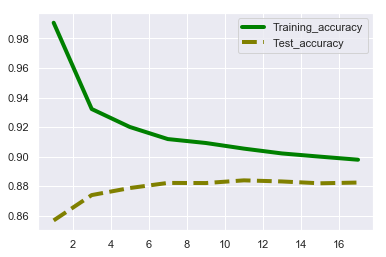

In [242]:
plt.plot( 'K', 'Training_accuracy', data=df_knn_d1 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_knn_d1, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [219]:
# Create and fit a nearest-neighbor classifier on D2 dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score_train_KN = []
score_test_KN = []
factor = []

for i in range(1,18,2):
    knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=i, 
                     p=2,
                     weights='uniform')
    knn.fit(X_r2,np.ravel(final_label))
    factor.append(i)
    score_train_KN.append(accuracy_score(np.ravel(final_label),knn.predict(X_r2)))
    score_test_KN.append(accuracy_score(y_test,knn.predict(X_test)))


print("Predictions form the classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test)

Predictions form the classifier:
[0 0 0 ... 7 9 9]
Target values:
      label
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
...     ...
2340    9.0
2341    9.0
2342    9.0
2343    9.0
2344    9.0
2345    9.0
2346    9.0
2347    9.0
2348    9.0
2349    9.0
2350    9.0
2351    9.0
2352    9.0
2353    9.0
2354    9.0
2355    9.0
2356    9.0
2357    9.0
2358    9.0
2359    9.0
2360    9.0
2361    9.0
2362    9.0
2363    9.0
2364    9.0
2365    9.0
2366    9.0
2367    9.0
2368    9.0
2369    9.0

[24190 rows x 1 columns]


In [137]:
print(knn.predict(X_test))

[0 0 0 ... 7 9 9]


In [221]:
df_knn_d2 = pd.DataFrame()
df_knn_d2['Training_accuracy'] = score_train_KN
df_knn_d2['Test_accuracy'] = score_test_KN
df_knn_d2['K'] =factor

In [222]:
df_knn_d2

,Training_accuracy,Test_accuracy,K
0,0.997560,0.896610,1
1,0.945901,0.910376,3
2,0.936249,0.915916,5
3,0.931971,0.915668,7
4,0.929065,0.916164,9
5,0.927584,0.915668,11
6,0.925583,0.916288,13
7,0.923910,0.916164,15
8,0.922896,0.915750,17


In [226]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


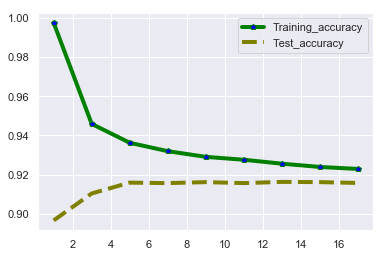

In [238]:
plt.plot( 'K', 'Training_accuracy', data=df_knn_d2 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_knn_d2, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [ ]:
##Parzen window classifier


In [27]:
from sklearn.neighbors.kde import KernelDensity

In [28]:
kde_d1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data_one)


In [29]:
kde_d1

KernelDensity(algorithm='auto', atol=0, bandwidth=0.2, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [48]:
# Create and fit a parzen windows classifier on D1 dataset

score_train_PW = []
score_test_PW = []
factor = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]

for i in factor:
    kde_d1 =  KernelDensity(kernel='gaussian', bandwidth= i)
    kde_d1.fit(data_one,final_label)
    score_train_PW.append(kde_d1.score(data_one))
    score_test_PW.append(kde_d1.score(data_two))

print("Predictions form the classifier:")
print(kde_d1.score(data_two))

Predictions form the classifier:
-592860.0207019402


In [51]:
df_PW_d1 = pd.DataFrame()
df_PW_d1['Training_accuracy'] = score_train_PW
df_PW_d1['Test_accuracy'] = score_test_PW
df_PW_d1['sigma'] = factor

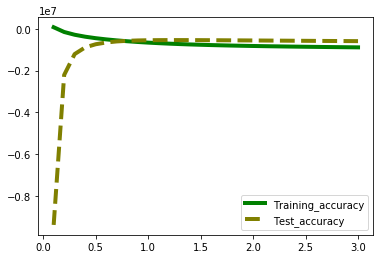

In [52]:
plt.plot( 'sigma', 'Training_accuracy', data=df_PW_d1 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'sigma', 'Test_accuracy', data=df_PW_d1, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [53]:
# Create and fit a parzen window classifier on D2 dataset

score_train_PW = []
score_test_PW = []
factor = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]

for i in factor:
    kde_d2 =  KernelDensity(kernel='gaussian', bandwidth= i)
    kde_d2.fit(X_r2,final_label)
    score_train_PW.append(kde_d1.score(X_r2))
    score_test_PW.append(kde_d1.score(X_test))

print("Predictions form the classifier:")
print(kde_d2.score(X_test))

Predictions form the classifier:
-489236.33602445683


In [54]:
df_PW_d2 = pd.DataFrame()
df_PW_d2['Training_accuracy'] = score_train_PW
df_PW_d2['Test_accuracy'] = score_test_PW
df_PW_d2['sigma'] =factor

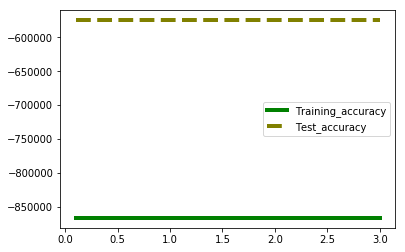

In [56]:
plt.plot( 'sigma', 'Training_accuracy', data=df_PW_d2 , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'sigma', 'Test_accuracy', data=df_PW_d2, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()